**Stocks Price prediction and Forecasting using Stacked LSTM**

In [1]:
'''
created on 11/08/2021
@author: Rohit Sharma

####################################
Steps:-
1. Collect the stock data -- AAPL (Apple company stock prices)
2. Process the data-- Train and Test
3. Create an Stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output
'''

'\ncreated on 11/08/2021\n@author: Rohit Sharma\n\n####################################\nSteps:-\n1. Collect the stock data -- AAPL (Apple company stock prices)\n2. Process the data-- Train and Test\n3. Create an Stacked LSTM model\n4. Predict the test data and plot the output\n5. Predict the future 30 days and plot the output\n'

In [2]:
#Get data from tiingo through API and save it for model prediction
import pandas_datareader as pdr   
key = ' ' # here you have add your API key

# Get API key from https://www.tiingo.com/

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

c:\users\rohit\appdata\local\programs\python\python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv(r'D:\Study\Deep Learning\Stocks Price Prediction usinf Stacked LSTM\AAPL.csv')

In [5]:
import pandas as pd 

In [6]:
df = pd.read_csv(r'D:\Study\Deep Learning\Stocks Price Prediction usinf Stacked LSTM\AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.359316,25.420264,25.265548,25.265548,74641736,0.0,1.0
1,AAPL,2016-08-15 00:00:00+00:00,109.48,109.54,108.08,108.14,25868209,25.664059,25.678124,25.335874,25.349939,103472836,0.0,1.0
2,AAPL,2016-08-16 00:00:00+00:00,109.38,110.23,109.21,109.63,33794448,25.640617,25.839872,25.600766,25.699221,135177792,0.0,1.0
3,AAPL,2016-08-17 00:00:00+00:00,109.22,109.37,108.34,109.10,25355976,25.603110,25.638273,25.396822,25.574980,101423904,0.0,1.0
4,AAPL,2016-08-18 00:00:00+00:00,109.08,109.60,109.02,109.23,21984703,25.570292,25.692189,25.556227,25.605454,87938812,0.0,1.0


In [8]:
df2 = df.reset_index()['close']

In [9]:
df2.head()

0    108.18
1    109.48
2    109.38
3    109.22
4    109.08
Name: close, dtype: float64

In [10]:
df2.shape

(1257,)

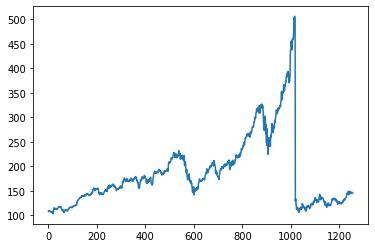

In [11]:
import matplotlib.pyplot as plt
plt.plot(df2)

LSTM are sensitive to use the scale of the data, so we apply MinMax scaler

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))  #here we are scaling the values between 0,1
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df2.shape

(1257, 1)

In [14]:
#splitting dataset into train and test split
training_size = int(len(df2)*0.65) #65% of data is my training data rest is testing
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:1]

In [15]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  #i = 0  0,1,2,3---99   in y_train 100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
#reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.01253226 0.01575839 0.01551022 ... 0.03149196 0.0323109  0.03198829]
 [0.01575839 0.01551022 0.01511316 ... 0.0323109  0.03198829 0.03345245]
 [0.01551022 0.01511316 0.01476573 ... 0.03198829 0.03345245 0.03667858]
 ...
 [0.22237939 0.22523327 0.23654953 ... 0.36140064 0.37892098 0.38309013]
 [0.22523327 0.23654953 0.23511018 ... 0.37892098 0.38309013 0.38217193]
 [0.23654953 0.23511018 0.23905599 ... 0.38309013 0.38217193 0.38244491]]


In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
#reshape input to be[samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  #1 is added here to convert into 3 dimesions
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
#stacked LSTM means one LSTM after the other
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 6s 255ms/step - loss: 0.0116 - val_loss: 0.0378
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0023 - val_loss: 0.0271
Epoch 3/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0013 - val_loss: 0.0250
Epoch 4/100
12/12 [==============================] - 2s 196ms/step - loss: 8.0337e-04 - val_loss: 0.0200
Epoch 5/100
12/12 [==============================] - 2s 199ms/step - loss: 5.3255e-04 - val_loss: 0.0220
Epoch 6/100
12/12 [==============================] - 2s 183ms/step - loss: 4.9378e-04 - val_loss: 0.0202
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 5.5726e-04 - val_loss: 0.0190
Epoch 8/100
12/12 [==============================] - 2s 195ms/step - loss: 5.7196e-04 - val_loss: 0.0186
Epoch 9/100
12/12 [==============================] - 2s 190ms/step - loss: 4.4402e-04 - val_loss: 0.0187
Epoch 10/100
12/12 [==============================] - 2s 175ms/step

12/12 [==============================] - 3s 222ms/step - loss: 1.2858e-04 - val_loss: 0.0135
Epoch 79/100
12/12 [==============================] - 3s 229ms/step - loss: 1.3037e-04 - val_loss: 0.0142
Epoch 80/100
12/12 [==============================] - 3s 223ms/step - loss: 1.4356e-04 - val_loss: 0.0132
Epoch 81/100
12/12 [==============================] - 3s 238ms/step - loss: 1.3133e-04 - val_loss: 0.0116
Epoch 82/100
12/12 [==============================] - 3s 225ms/step - loss: 1.2671e-04 - val_loss: 0.0118
Epoch 83/100
12/12 [==============================] - 3s 231ms/step - loss: 1.2048e-04 - val_loss: 0.0140
Epoch 84/100
12/12 [==============================] - 3s 235ms/step - loss: 1.2335e-04 - val_loss: 0.0109
Epoch 85/100
12/12 [==============================] - 3s 294ms/step - loss: 1.1303e-04 - val_loss: 0.0118
Epoch 86/100
12/12 [==============================] - 4s 340ms/step - loss: 1.1572e-04 - val_loss: 0.0118
Epoch 87/100
12/12 [==============================] - 4s 32

In [25]:
import tensorflow as tf

In [26]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [27]:
#transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
#calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

180.7418876060325

In [29]:
#test data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

238.42010059659626

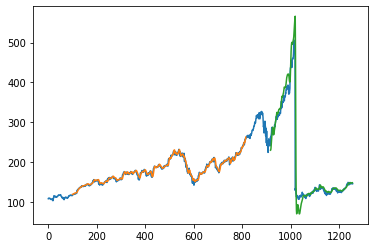

In [30]:
#Plotting
#shift train predictions for plotting 
look_back = 100
trainPredictplot = numpy.empty_like(df2)
trainPredictplot[:, :] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictplot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

440

orange color line is train_predict data and green color line is test_predict data

In [32]:
#No we have to predict future 30 days

x_input = test_data[340:].reshape(1,-1)  # I am taking previous 100 days data from 440 to 340
x_input.shape

(1, 100)

In [34]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [35]:
temp_input

[0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.06000595592614655,
 0.055340480444709184,
 0.05948

In [36]:
#demostrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 99
i = 0
while(i<30):
    if(len(temp_input)>99):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
        
print(lst_output)

0 day input [0.05027794 0.04816855 0.04208854 0.04332936 0.04486798 0.04531467
 0.04161703 0.04720071 0.04931011 0.05650685 0.05727616 0.06147012
 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892
 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222
 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491
 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167
 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407
 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824
 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685
 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817
 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847 0.07586361
 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305
 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528
 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998
 0.10489875 0.10837304 0.11274072 0.11380782 0.108

6 day output [[0.11741421]]
7 day input [0.04720071 0.04931011 0.05650685 0.05727616 0.06147012 0.06757495
 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516
 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 

18 day output [[0.12829643]]
19 day input [0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826 0.10673516
 0.10661108 0.10539508 0.11163047 0.11184355 0.11262681 0.11373936
 0.11497672 0.1162197

29 day output [[0.13791315]]
[[0.11163046956062317], [0.1118435487151146], [0.1126268059015274], [0.11373936384916306], [0.11497671902179718], [0.11621972918510437], [0.1174142137169838], [0.11854200810194016], [0.11960186809301376], [0.12059956043958664], [0.12154368311166763], [0.12244411557912827], [0.12331102788448334], [0.12415449321269989], [0.12498382478952408], [0.1258070170879364], [0.12663055956363678], [0.127459317445755], [0.12829643487930298], [0.12914349138736725], [0.13000069558620453], [0.13086740672588348], [0.13174201548099518], [0.13262255489826202], [0.13350681960582733], [0.13439248502254486], [0.13527758419513702], [0.13616028428077698], [0.1370391696691513], [0.13791315257549286]]


In [75]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)

In [76]:
import matplotlib.pyplot as plt
len(df2)

1257

In [77]:
df3 = df2.tolist()
df3.extend(lst_output)

In [78]:
len(day_pred)

30

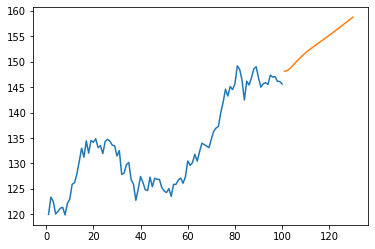

In [79]:
plt.plot(day_new, scaler.inverse_transform(df2[1157:]))  #1257 - 100days = 1157
plt.plot(day_pred, scaler.inverse_transform(lst_output))

This graph is showing next 30 days prdiction 

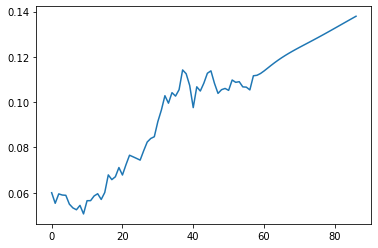

In [86]:
df3 = df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [80]:
df3=scaler.inverse_transform(df3).tolist()

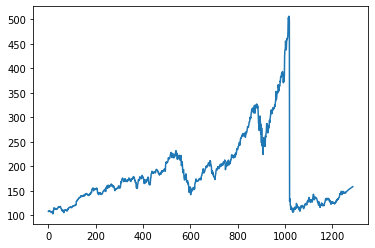

In [81]:
plt.plot(df3)